[View in Colaboratory](https://colab.research.google.com/github/DSierraB/CUFICO-2018-2/blob/master/BasicPyROOTExample.ipynb)

# With this notebook we will:
## 1. Install packages needed for root
## 2. Download a binary root that compiled in google drive "colaboratory" environement
## 3. Modify the PATH in order to tell python where to look for pyROOT
## 4. Finally, test ROOT installation with a simple example

##### Author: Jose Ruiz
##### Maintainer: Jose Ruiz
##### Developed at: Universidad de Antioquia


### 1. Install packages needed for root

In [1]:
!apt-get install git dpkg-dev cmake g++ gcc binutils libx11-dev libxpm-dev libxft-dev libxext-dev tar gfortran subversion

Reading package lists... Done
Building dependency tree       
Reading state information... Done
binutils is already the newest version (2.29.1-4ubuntu1).
cmake is already the newest version (3.9.1-1).
dpkg-dev is already the newest version (1.18.24ubuntu1).
g++ is already the newest version (4:7.2.0-1ubuntu1).
gcc is already the newest version (4:7.2.0-1ubuntu1).
gfortran is already the newest version (4:7.2.0-1ubuntu1).
libx11-dev is already the newest version (2:1.6.4-3).
libxext-dev is already the newest version (2:1.3.3-1).
libxft-dev is already the newest version (2.3.2-1).
libxpm-dev is already the newest version (1:3.5.12-1).
subversion is already the newest version (1.9.7-2ubuntu1).
tar is already the newest version (1.29b-2).
git is already the newest version (1:2.14.1-1ubuntu4.1).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.


### 2. Mount the drive to get the root binary and untar it 

In [2]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/Team Drives/CUFICO1"

BasicPyROOTExample.ipynb  root_build_google_yikes.tar


In [0]:
!tar -xf /content/drive/Team\ Drives/CUFICO1/root_build_google_yikes.tar

In [4]:
!ls -ltrh

total 12K
drwxr-xr-x 44 root root 4.0K Sep 20 23:35 root_build
drwxr-xr-x  2 root root 4.0K Sep 27 01:09 sample_data
drwx------  3 root root 4.0K Sep 27 18:39 drive



### 3. Modify the PATH in order to tell python where to look for pyROOT


In [0]:
import sys
sys.path.append("/content/root_build/")
sys.path.append("/content/root_build/bin/")
sys.path.append("/content/root_build/include/")
sys.path.append("/content/root_build/lib/")

In [6]:
import ROOT

Welcome to JupyROOT 6.14/04


# We made it!!! :)

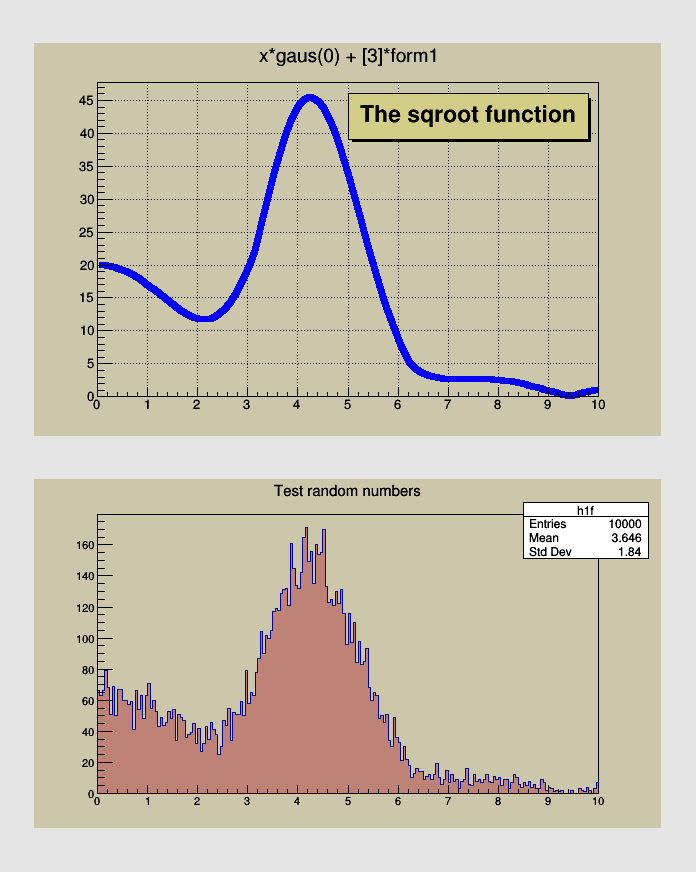

In [7]:
from os import path
from ROOT import TCanvas, TPad, TFormula, TF1, TPaveLabel, TH1F, TFile, TPaveText
from ROOT import gROOT, gBenchmark


c1 = TCanvas( 'c1', 'The FillRandom example', 200, 10, 700, 900 )
c1.SetFillColor( 18 )

pad1 = TPad( 'pad1', 'The pad with the function',  0.05, 0.50, 0.95, 0.95, 21 )
pad2 = TPad( 'pad2', 'The pad with the histogram', 0.05, 0.05, 0.95, 0.45, 21 )
pad1.Draw()
pad2.Draw()
pad1.cd()

form1 = TFormula( 'form1', 'abs(sin(x)/x)' )
sqroot = TF1( 'sqroot', 'x*gaus(0) + [3]*form1', 0, 10 )
sqroot.SetParameters( 10, 4, 1, 20 )
pad1.SetGridx()
pad1.SetGridy()
pad1.GetFrame().SetFillColor( 42 )
pad1.GetFrame().SetBorderMode( -1 )
pad1.GetFrame().SetBorderSize( 5 )
sqroot.SetLineColor( 4 )
sqroot.SetLineWidth( 6 )
sqroot.Draw()
lfunction = TPaveLabel( 5, 39, 9.8, 46, 'The sqroot function' )
lfunction.SetFillColor( 41 )
lfunction.Draw()
c1.Update()

pad2.cd();
pad2.GetFrame().SetFillColor( 42 )
pad2.GetFrame().SetBorderMode( -1 )
pad2.GetFrame().SetBorderSize( 5 )
h1f = TH1F( 'h1f', 'Test random numbers', 200, 0, 10 )
h1f.SetFillColor( 45 )
h1f.FillRandom( 'sqroot', 10000 )
h1f.Draw()
c1.Update()

myfile = TFile( 'py-fillrandom.root', 'RECREATE' )
form1.Write()
sqroot.Write()
h1f.Write()
myfile.Close()

from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()

TFile**		py-fillrandom.root	
 TFile*		py-fillrandom.root	
  KEY: TFormula	form1;1	abs(sin(x)/x)
  KEY: TF1	sqroot;1	x*gaus(0) + [3]*form1
  KEY: TH1F	h1f;1	Test random numbers
Formula based function:     sqroot 
               sqroot : x*gaus(0) + [3]*form1 Ndim= 1, Npar= 4, Number= 0 
 Formula expression: 
	x*[p0]*exp(-0.5*((x-[p1])/[p2])*((x-[p1])/[p2]))+[p3]*(abs(sin(x)/x)) 
Contained histogram
TH1.Print Name  = Func, Entries= 300, Total sum= 1514.36
 FCN=198.935 FROM MIGRAD    STATUS=CONVERGED     148 CALLS         149 TOTAL
                     EDM=2.98567e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           3.31658e+01   5.45703e-01   3.00376e-03  -1.11540e-03
   2  p1           4.00667e+00   1.65304e-02   9.48491e-05  -3.06425e-02
   3  p2           9.84663e-01   1.28238e-02   6.05976e-05  -3.04244e-02
   4  p3           6.3

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


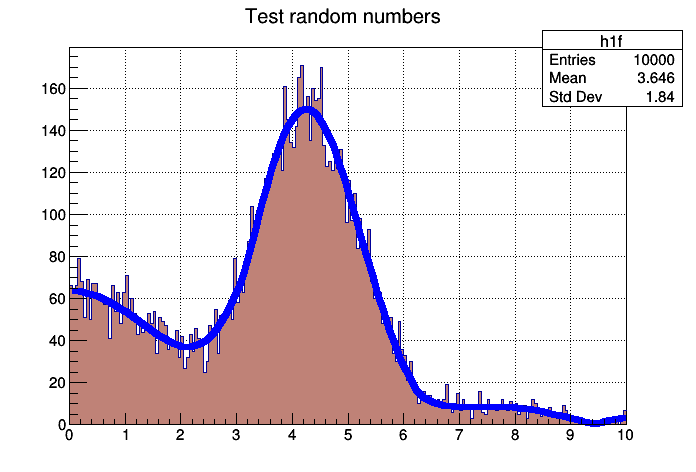

In [0]:
c1 = TCanvas( 'c1', 'The Fit Canvas', 200, 10, 700, 500 )
c1.SetGridx()
c1.SetGridy()
c1.GetFrame().SetFillColor( 21 )
c1.GetFrame().SetBorderMode(-1 )
c1.GetFrame().SetBorderSize( 5 )

fill = TFile( 'py-fillrandom.root' )

fill.ls()

sqroot = gROOT.FindObject( 'sqroot' )
sqroot.Print()

h1f = gROOT.FindObject( 'h1f' )
h1f.SetFillColor( 45 )
h1f.Fit( 'sqroot' )

c1.Update()

gROOT.GetListOfCanvases().Draw()